In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
covid_19_df['Date'] = pd.to_datetime(covid_19_df['Date'])
covid_19_df['Country/Region'] = covid_19_df['Country/Region'].replace('Mainland China', 'China')
covid_19_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
15059,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-03-17,1,1,0
15060,Reunion,France,-21.1351,55.2471,2020-03-17,9,0,0
15061,NaN,Barbados,13.1939,-59.5432,2020-03-17,2,0,0
15062,NaN,Montenegro,42.5000,19.3000,2020-03-17,2,0,0
15063,NaN,The Gambia,13.4667,-16.6000,2020-03-17,1,0,0


In [3]:
date_range = covid_19_df['Date'].sort_values().drop_duplicates().dt.strftime('%d.%m').reset_index(drop=True)

In [4]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
covid_19_df['Active'] = covid_19_df['Confirmed'] - covid_19_df['Deaths'] - covid_19_df['Recovered']
covid_19_df = covid_19_df.sort_values(by=['Date'], ascending=True)
covid_19_df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
171,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14


### Finding Countries with most confirmed cases

In [5]:
last_covid_df = covid_19_df[covid_19_df['Date'] == covid_19_df['Date'].max()].reset_index(drop=True)
last_covid_df = last_covid_df.drop(columns=['Lat', 'Long'])
top_50 = last_covid_df.groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(50)
top_50.head(2)

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81058,3230,68798,9030
Italy,31506,2503,2941,26062


In [6]:
def prepare_data(func):
    def inside(df, country):
        df = df[df['Country/Region'] == country]
        if (country == 'China') | (country == 'US') | (country == 'Australia') | (country == 'Canada'):
            df = df.groupby('Date').sum()
        elif df[df['Province/State'] == country].notna().any().any():
            df = df[df['Province/State'] == country]
        func(df, country)
    return inside

In [10]:
@prepare_data
def show_increment(df, country):
    country_df = df.sort_values(by='Date').reset_index(drop=True)
    
    my_xticks = range(0, len(date_range), 10)
    l_date_range = list(date_range)
    my_xticks_labels = l_date_range[0:len(date_range):10]
    
    fig, ax = plt.subplots(figsize=(14, 5))
    ax = sns.lineplot(data=country_df[cases], ax=ax)
    ax.set_xticks(my_xticks)
    ax.set_xticklabels(my_xticks_labels)
    ax.set_xlabel(country)
    plt.show()

### Plots for 50 countries with most confirmed cases

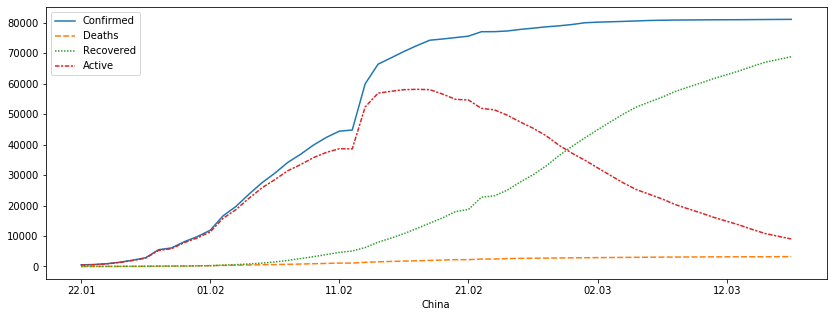

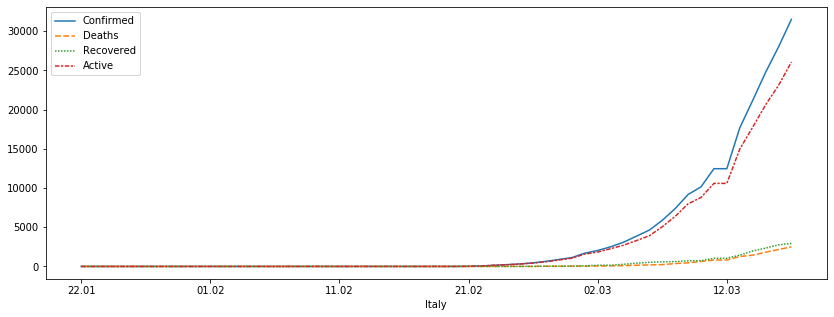

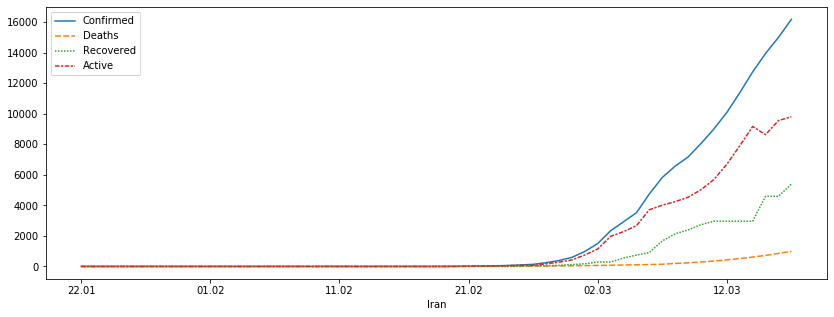

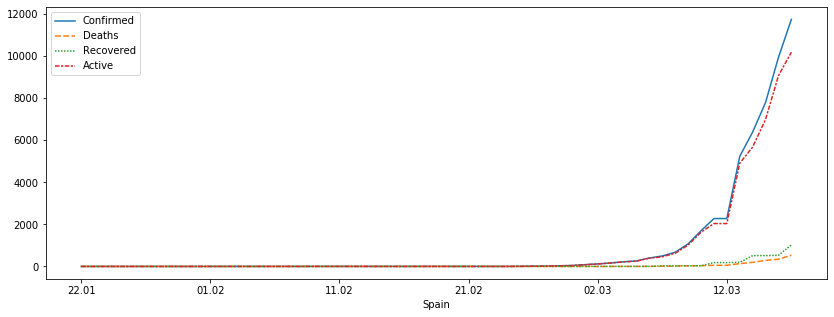

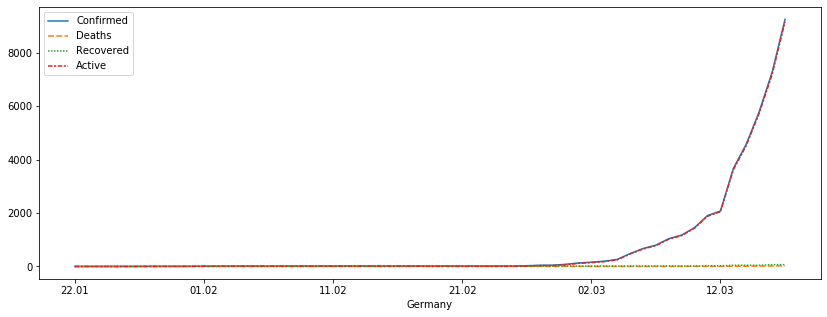

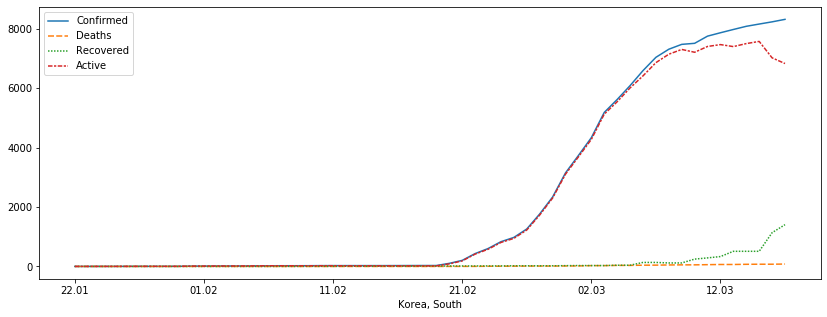

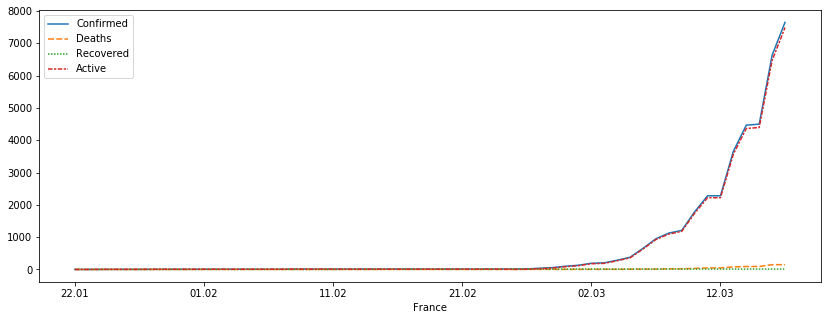

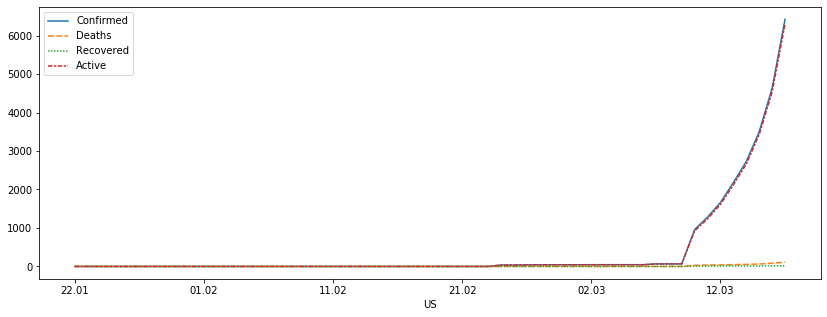

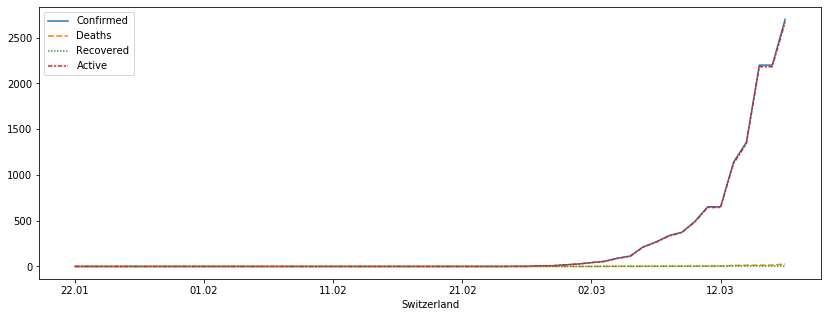

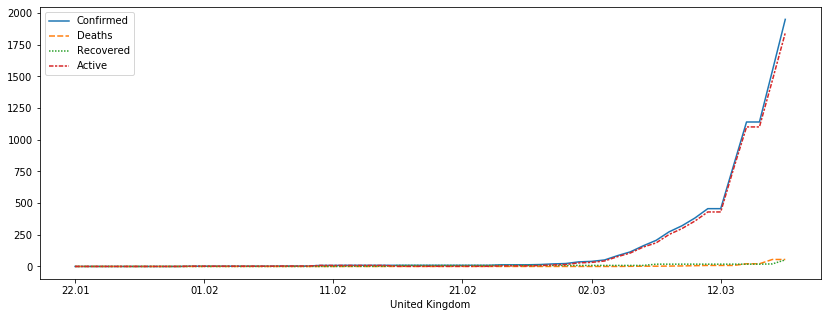

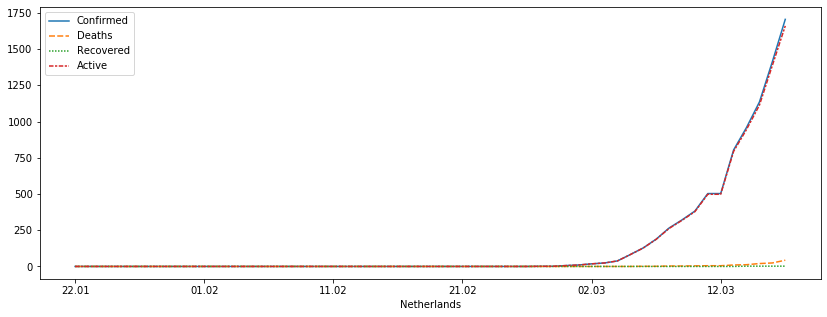

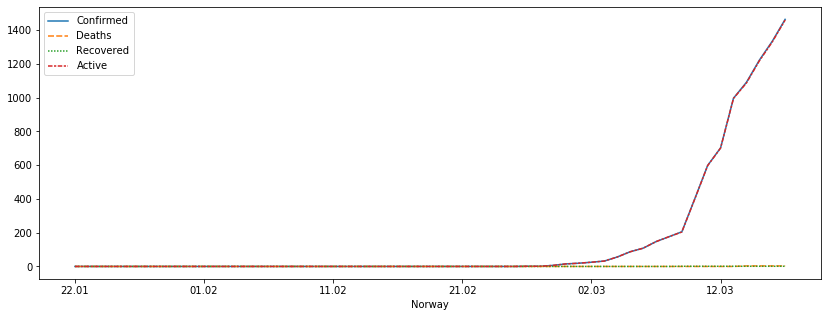

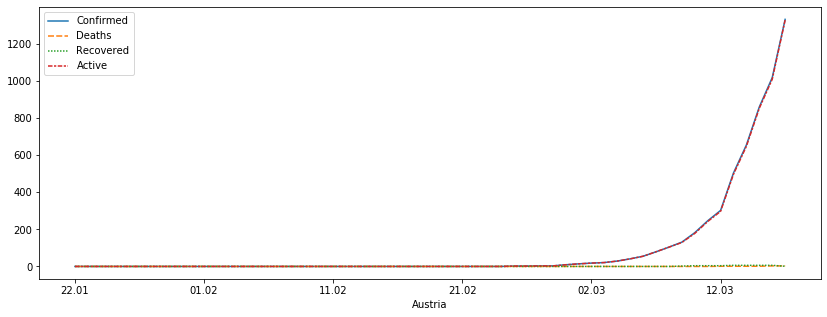

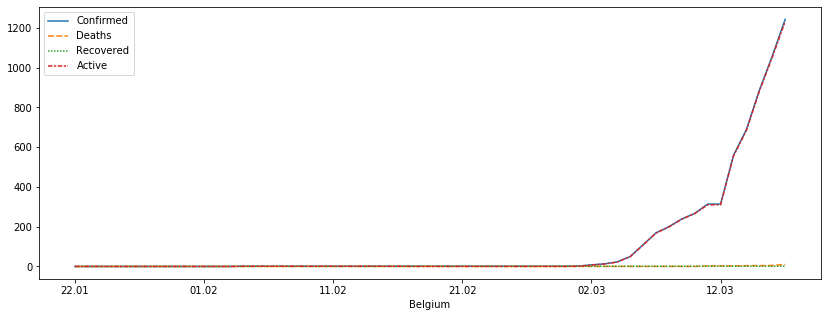

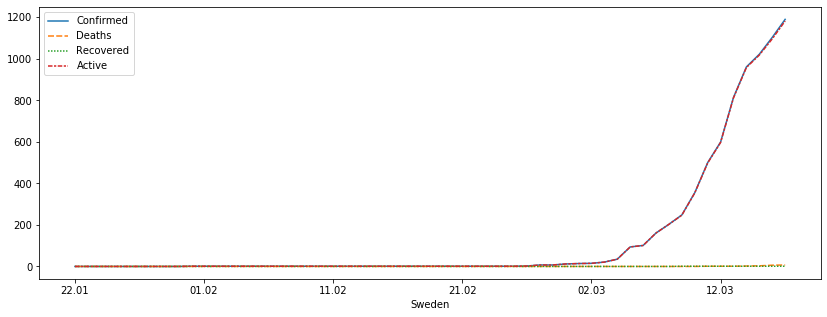

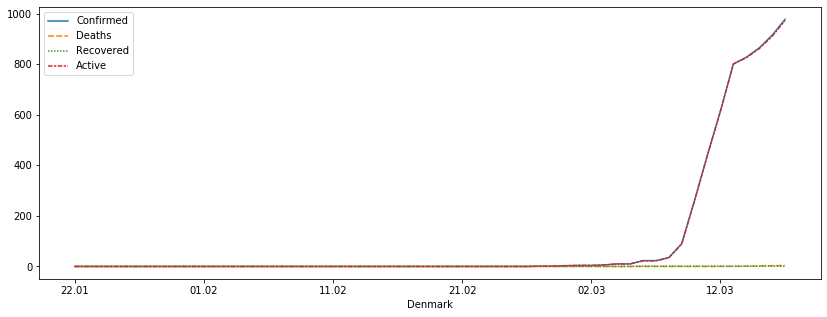

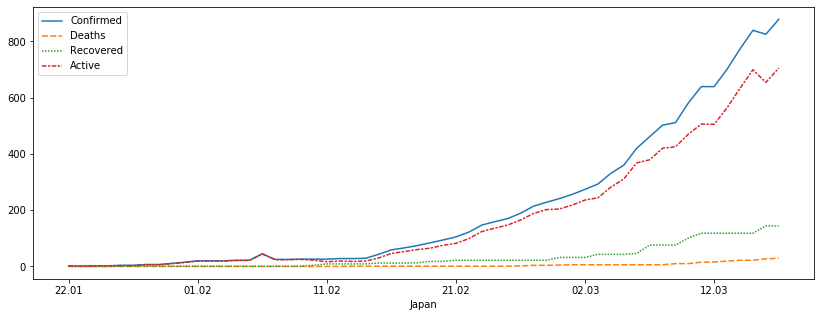

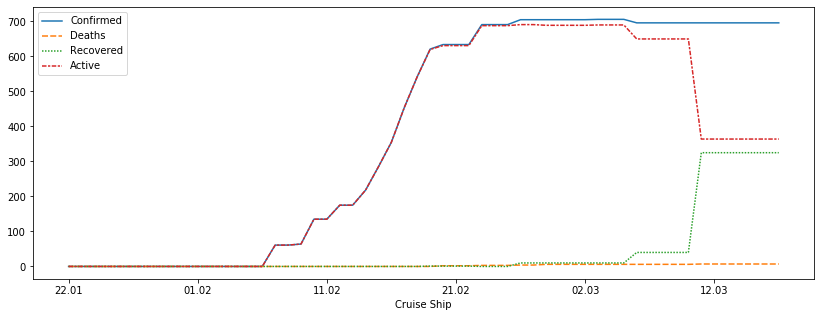

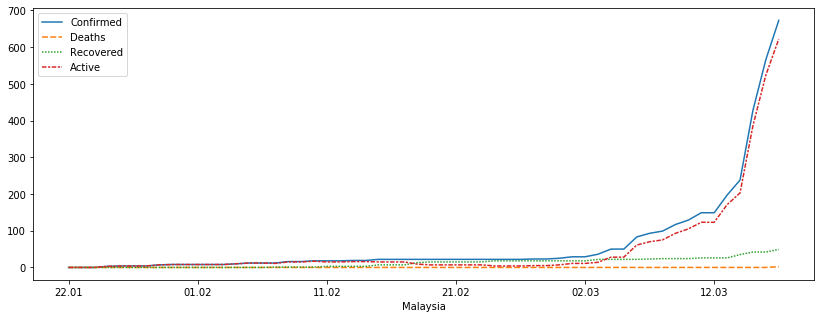

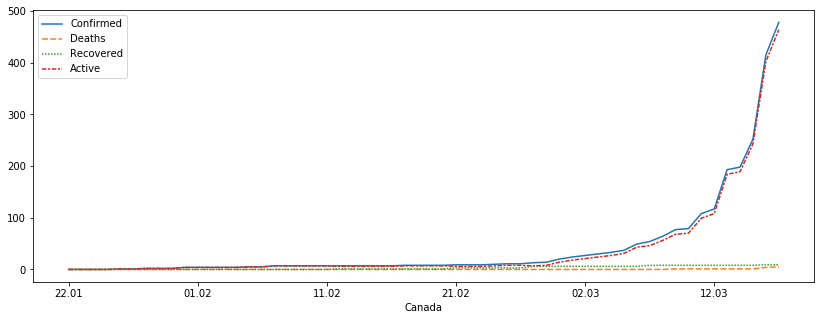

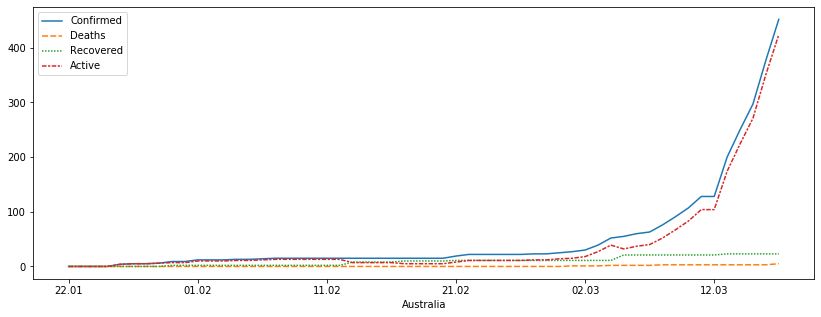

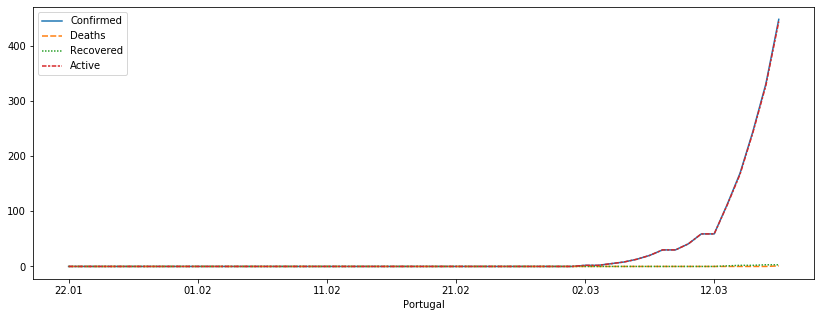

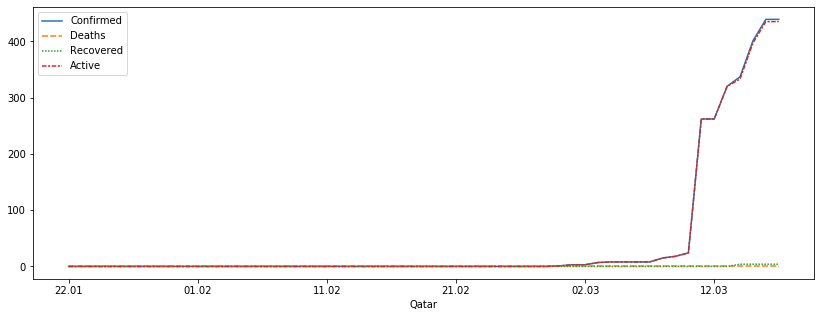

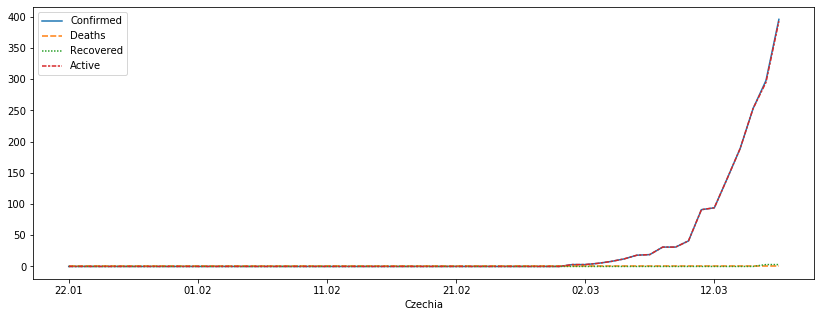

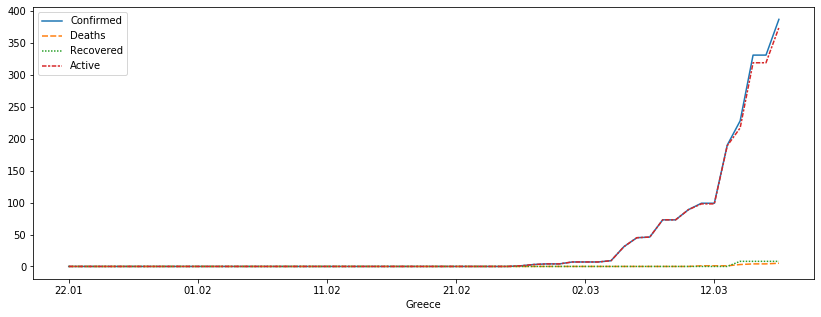

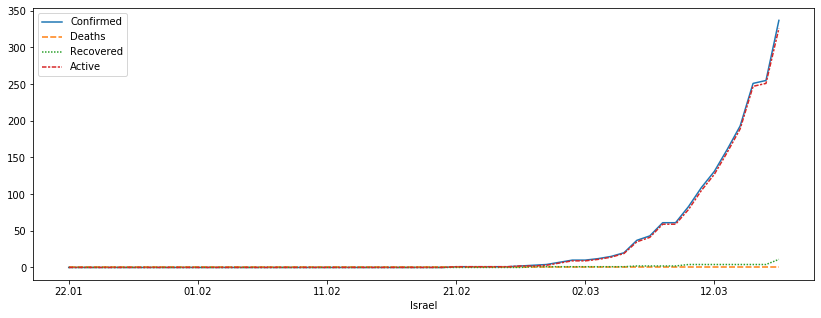

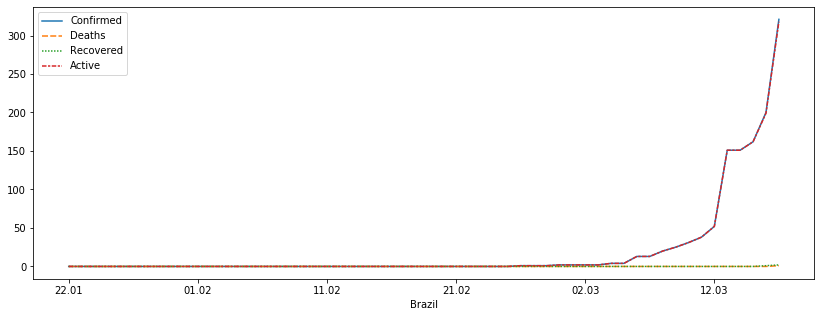

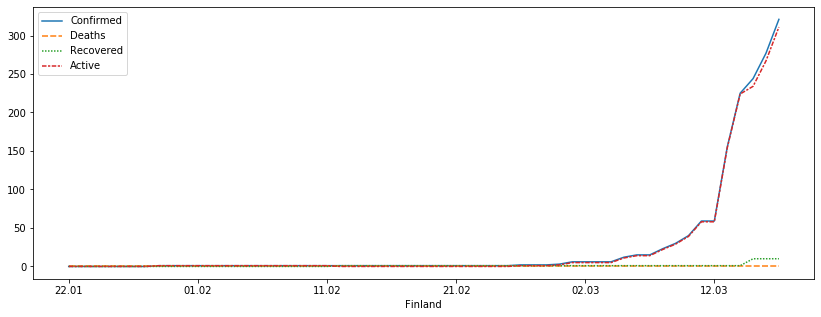

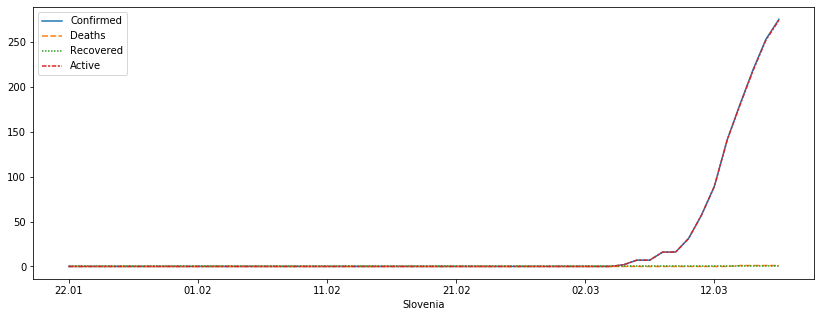

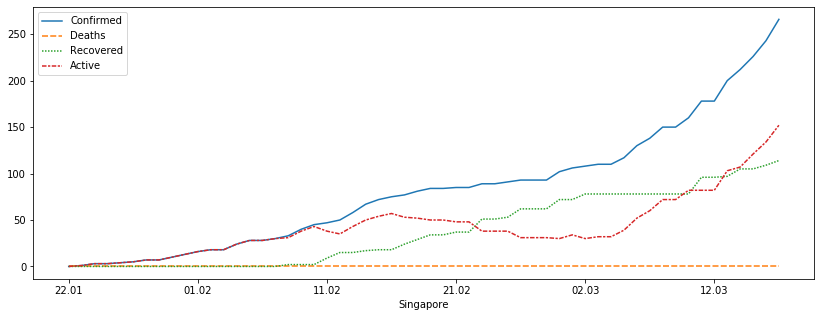

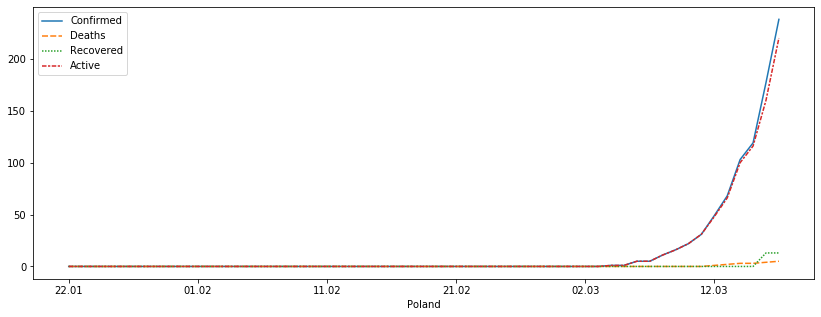

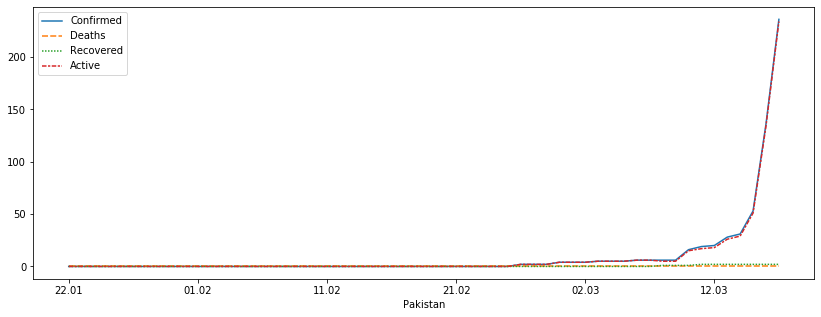

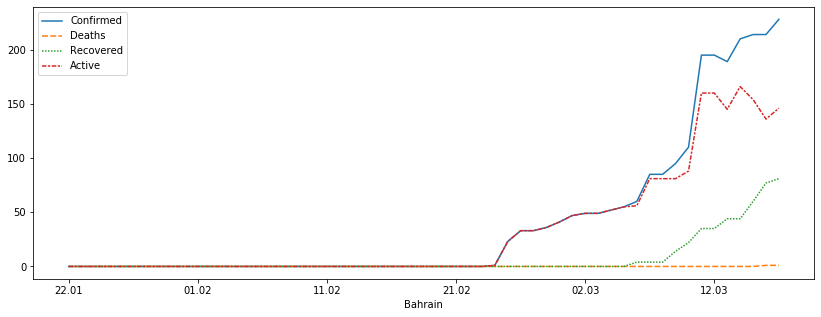

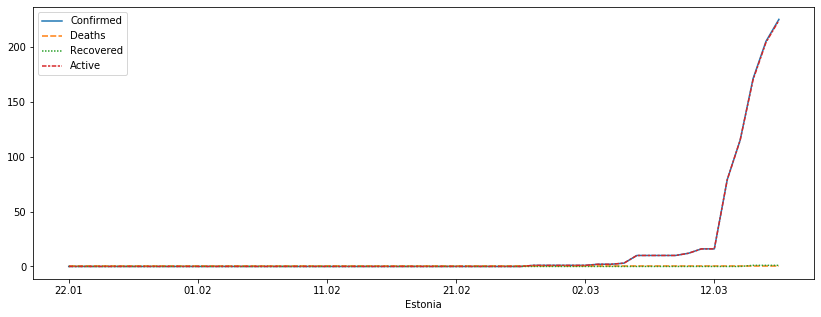

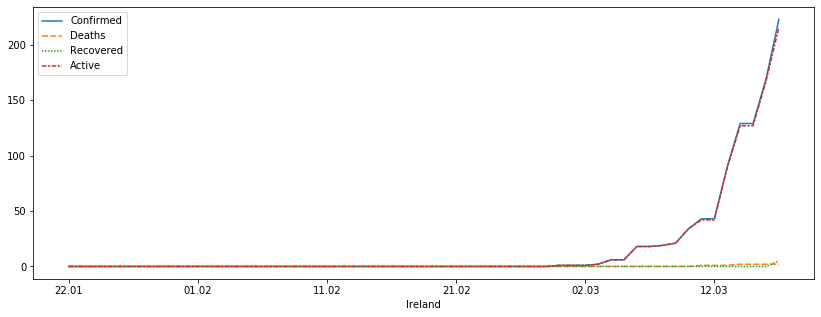

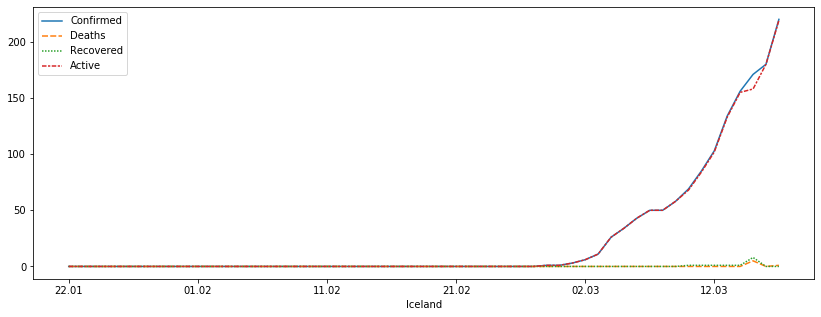

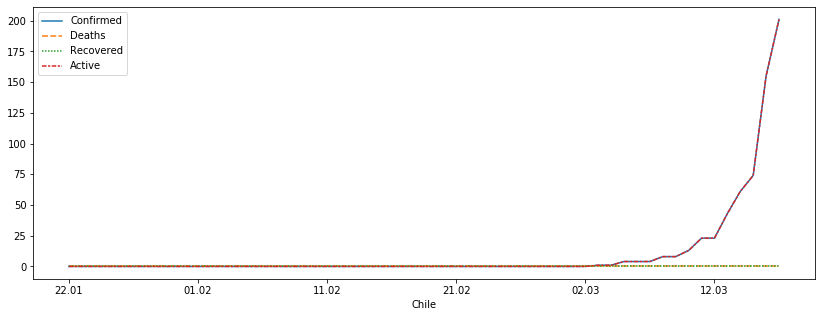

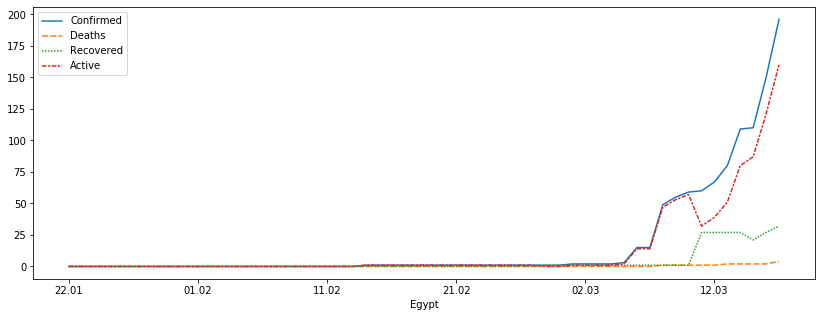

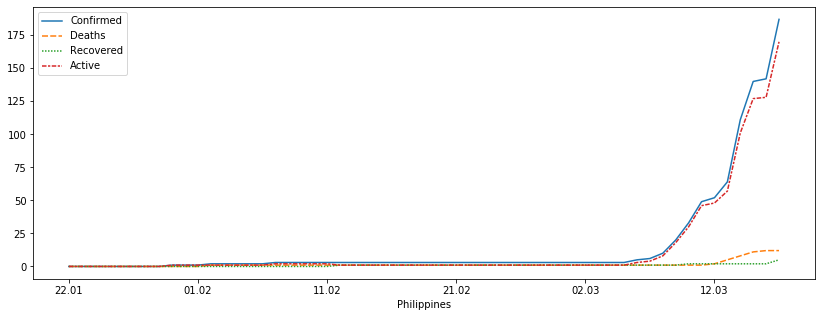

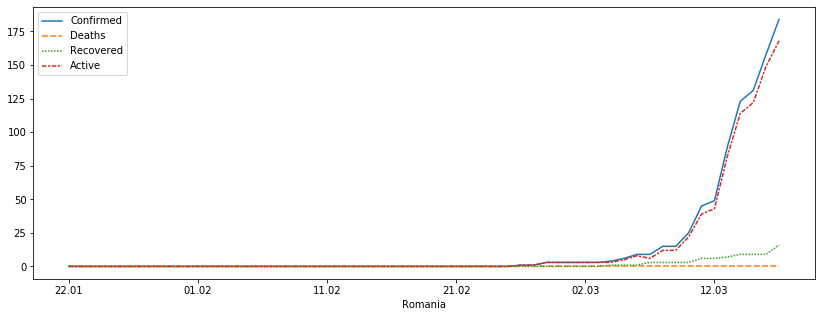

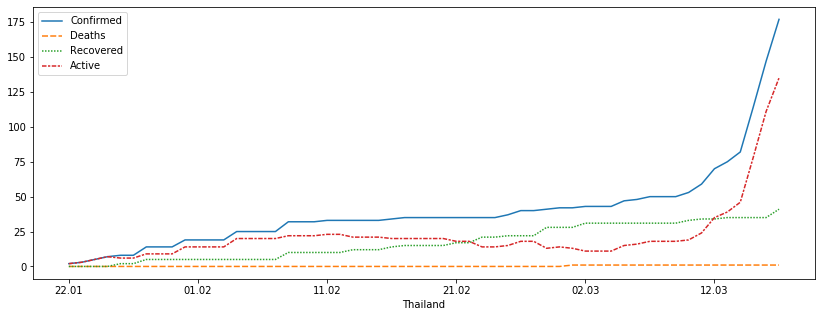

In [ ]:
for country in top_50.index:
    show_increment(covid_19_df, country)